
# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

4. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия.

In [1]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets.samples_generator import make_regression

import matplotlib.pyplot as plt
from matplotlib import cm

### 1. метод ближайших соседей работает хуже, чем логистическая регрессия

Кривая между классами проводится легко, но элементы другого класса ближе элементов своего класса.

In [2]:
X1 = np.array([[i, -0.25] for i in range(100)] + [[i, 0.25] for i in range(100)])
y1 = np.array([1 if el[1] > 0 else 0 for el in X1])

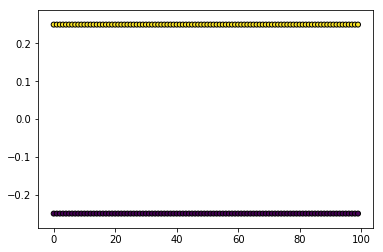

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k')

In [4]:
knn = KNN(n_neighbors=3)
kf = KFold(n_splits=5)

clf = LogisticRegression()

for train, test in kf.split(X1):
    knn.fit(X1[train], y1[train])
    
    clf.fit(X1[train], y1[train])
    
    print(accuracy_score(y1[test], knn.predict(X1[test])), accuracy_score(y1[test], clf.predict(X1[test])))

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.925


### 2. логистическая регрессия работает хуже, чем метод ближайших соседей

Классы сгруппированы, но их невозможно разделить кривой.

In [5]:
rng = np.random.RandomState(0)
X2 = rng.randn(1000, 2)
y2 = np.logical_xor(X2[:, 0] > 0, X2[:, 1] > 0)

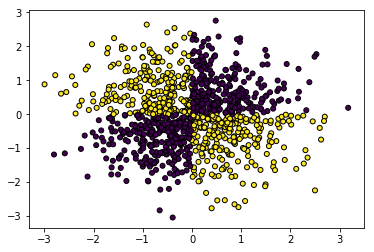

In [6]:
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=25, edgecolor='k')

In [7]:
knn = KNN(n_neighbors=3)
kf = KFold(n_splits=5)

clf = LogisticRegression()

for train, test in kf.split(X2):
    knn.fit(X2[train], y2[train])
    
    clf.fit(X2[train], y2[train])
    
    print(accuracy_score(y2[test], knn.predict(X2[test])), accuracy_score(y2[test], clf.predict(X2[test])))

0.96 0.5
0.955 0.575
0.955 0.49
0.97 0.515
0.955 0.465


### 3. метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой

In [8]:
knn = KNN(n_neighbors=3)
knn_cos = KNN(n_neighbors=3, metric='cosine')
kf = KFold(n_splits=5)


for train, test in kf.split(X1):
    knn.fit(X1[train], y1[train])
    
    knn_cos.fit(X1[train], y1[train])
    
    print(accuracy_score(y1[test], knn.predict(X1[test])), accuracy_score(y1[test], knn_cos.predict(X1[test])))

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


### 4. решающее дерево работает хуже, чем линейная регрессия

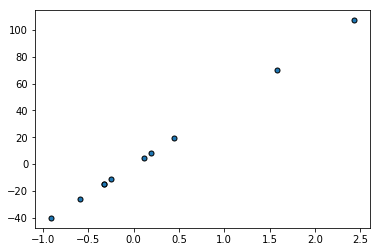

In [9]:
X4, y4 = make_regression(n_samples=10, n_features=1, random_state=5)
plt.scatter(X4, y4, marker='o', s=25, edgecolor='k')

In [10]:
kf = KFold(n_splits=5)

reg = LinearRegression()
tree = DecisionTreeRegressor(random_state=0)

print(cross_val_score(reg, X4, y4, cv=5))
print(cross_val_score(tree, X4, y4, cv=5))

[1. 1. 1. 1. 1.]
[0.70719445 0.75599363 0.81115763 0.73570264 0.93728599]
